<h1>Heart Attack Risk Analysis and Prediction</h1>

This project involves analyzing an AI-generated dataset designed to mimic real-world heart attack risk factors. The dataset consists of 26 columns and 8,763 entries, containing various health-related attributes listed below:

- Patient ID --- Unique identifier for each patient
- Age --- Age of the patient
- Sex --- Gender of the patient (Male/Female)
- Cholesterol --- Cholesterol levels of the patient
- Blood Pressure --- Blood pressure of the patient (systolic/diastolic)
- Heart Rate --- Heart rate of the patient
- Diabetes --- Whether the patient has diabetes (Yes/No)
- Family History --- Family history of heart-related problems (1: Yes, 0: No)
- Smoking --- Smoking status of the patient (1: Smoker, 0: Non-smoker)
- Obesity --- Obesity status of the patient (1: Obese, 0: Not obese)
- Alcohol Consumption --- Level of alcohol consumption by the patient (1: Yes, 0: No)
- Exercise Hours Per Week --- Number of exercise hours per week
- Diet --- Dietary habits of the patient (Healthy/Average/Unhealthy)
- Previous Heart Problems --- Previous heart problems of the patient (1: Yes, 0: No)
- Medication Use --- Medication usage by the patient (1: Yes, 0: No)
- Stress Level --- Stress level reported by the patient (1-10)
- Sedentary Hours Per Day --- Hours of sedentary activity per day
- Income --- Yearly income level of the patient (in USD)
- BMI --- Body Mass Index (BMI) of the patient
- Triglycerides --- Triglyceride levels of the patient
- Physical Activity Days Per Week --- Days of physical activity per week
- Sleep Hours Per Day --- Hours of sleep per day
- Country --- Country of the patient
- Continent --- Continent where the patient resides
- Hemisphere --- Hemisphere where the patient resides
- Heart Attack Risk --- Presence of heart attack risk (1: Yes, 0: No)

The goal of this project is to extract meaningful insights from the data through exploratory data analysis (EDA) and statistical methods. Additionally, a machine learning model will be developed to predict the probability of a person experiencing a heart attack based on their features. Various evaluation metrics will be used to assess the model’s performance, ensuring it provides accurate and reliable predictions.

<h2>Importing libraries</h2>

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

<h2>1) Importing and analyzing the dataset</h2>

We will load the dataset, and view the first 5 rows to view the imported dataset in more detail.

In [53]:
df = pd.read_csv('heart_attack_prediction_dataset.csv')
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


Now that we have imported the dataset, we will explore the dataset so that we have a general understanding of what the dataset looks like. We will use:

- .shape to denote the number of rows and columns
- .columns to ensure that we have all the desired columns available
- .describe to get a summary for each column of the dataset

In [54]:
print('SHAPE:', df.shape)
print('\nCOLUMNS:\n  ', df.columns)
print('\nSUMMARY:\n', df.describe())

SHAPE: (8763, 26)

COLUMNS:
   Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

SUMMARY:
                Age  Cholesterol   Heart Rate     Diabetes  Family History  \
count  8763.000000  8763.000000  8763.000000  8763.000000     8763.000000   
mean     53.707977   259.877211    75.021682     0.652288        0.492982   
std      21.249509    80.863276    20.550948     0.476271        0.499979   
min      18.000000   120.000000    40.000000     0.000000        0.000000   
25%      35.000000   192.000000    57.000000     0.000000        0.000000   


<h2>2) Data Preprocessing</h2>

We will check our dataset for any missing values. If found, we will have to drop the null columns.

In [55]:
print(df.isnull().sum())

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64


Although we do not have any null values in the dataset, we will drop null values as it is good coding practice.

In [56]:
df = df.dropna()
df.shape

(8763, 26)

To make better use of the data, we will set the 'Patient ID' column as the primary key. However, we need to make sure that it meets the requirements of being made the primary key, i.e. it should hold only unique values.

In [57]:
df['Patient ID'].unique().shape[0] == df.shape[0]

True

Now that we are sure that it holds only unique values, we will set 'Patient ID' as the primary key.

In [58]:
df = df.set_index('Patient ID')
df.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
Patient ID,,,,,,,,,,,,,,,,,,,,,
BMW7812,67,Male,208,158/88,72,0,0,1,0,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
CZE1114,21,Male,389,165/93,98,1,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
BNI9906,21,Female,324,174/99,72,1,0,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
JLN3497,84,Male,383,163/100,73,1,1,1,0,1,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
GFO8847,66,Male,318,91/88,93,1,1,1,1,0,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


From here onwards, for the purpose of readability, we will convert the dataset values from numeric to strings. This would provide a better information of the information we have regarding each feature.

In [59]:
df['Sex'] = df['Sex'].replace({'M': 'Male', 'F': 'Female'}) 
df['Diabetes'] = df['Diabetes'].replace({1: 'Yes', 0: 'No'})
df['Family History'] = df['Family History'].replace({1: 'Yes', 0: 'No'})
df['Smoking'] = df['Smoking'].replace({1: 'Smoker', 0: 'Non-Smoker'})
df['Obesity'] = df['Obesity'].replace({1: 'Obese', 0: 'Not Obese'})
df['Alcohol Consumption'] = df['Alcohol Consumption'].replace({1: 'Consumes Alcohol', 0: 'Doesnt consume alcohol'})
df['Previous Heart Problems'] = df['Previous Heart Problems'].replace({1: 'Yes', 0: 'No'})
df['Medication Use'] = df['Medication Use'].replace({1: 'Yes', 0: 'No'})
df['Heart Attack Risk'] = df['Heart Attack Risk'].replace({1: 'At Risk', 0: 'No Risk'})

Next, we split "Blood Pressure" into two numeric columns, "Systolic" and "Diastolic"

In [60]:
bp_index = df.columns.get_loc("Blood Pressure")
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)
df.drop(columns=['Blood Pressure'], inplace=True)
df = pd.concat([df.iloc[:, :bp_index], df[['Systolic', 'Diastolic']], df.iloc[:, bp_index:]], axis=1)

<h2>3) Data Visualization</h2>

We will now investigate to see how many individuals in the dataset pose a heart attack risk as compared to ones who don't. 

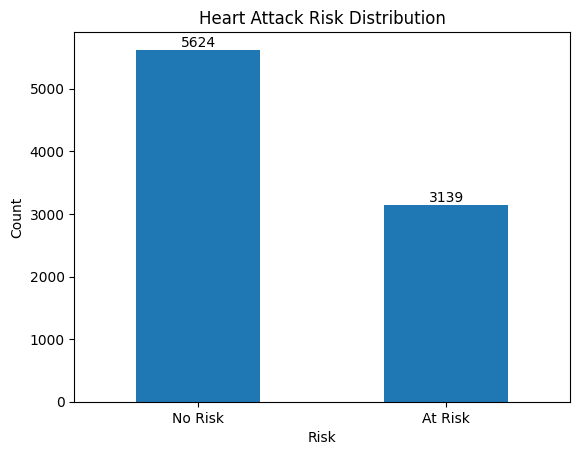

In [61]:
ax = df['Heart Attack Risk'].value_counts().plot(kind='bar')
plt.title('Heart Attack Risk Distribution')
plt.xlabel('Risk')
plt.ylabel('Count')
plt.xticks(rotation=0)
# Add counts on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1, int(height), ha="center", va="bottom")
plt.show()

We will now make a correlation heatmap to see which pairs are strongly correlated to each other.

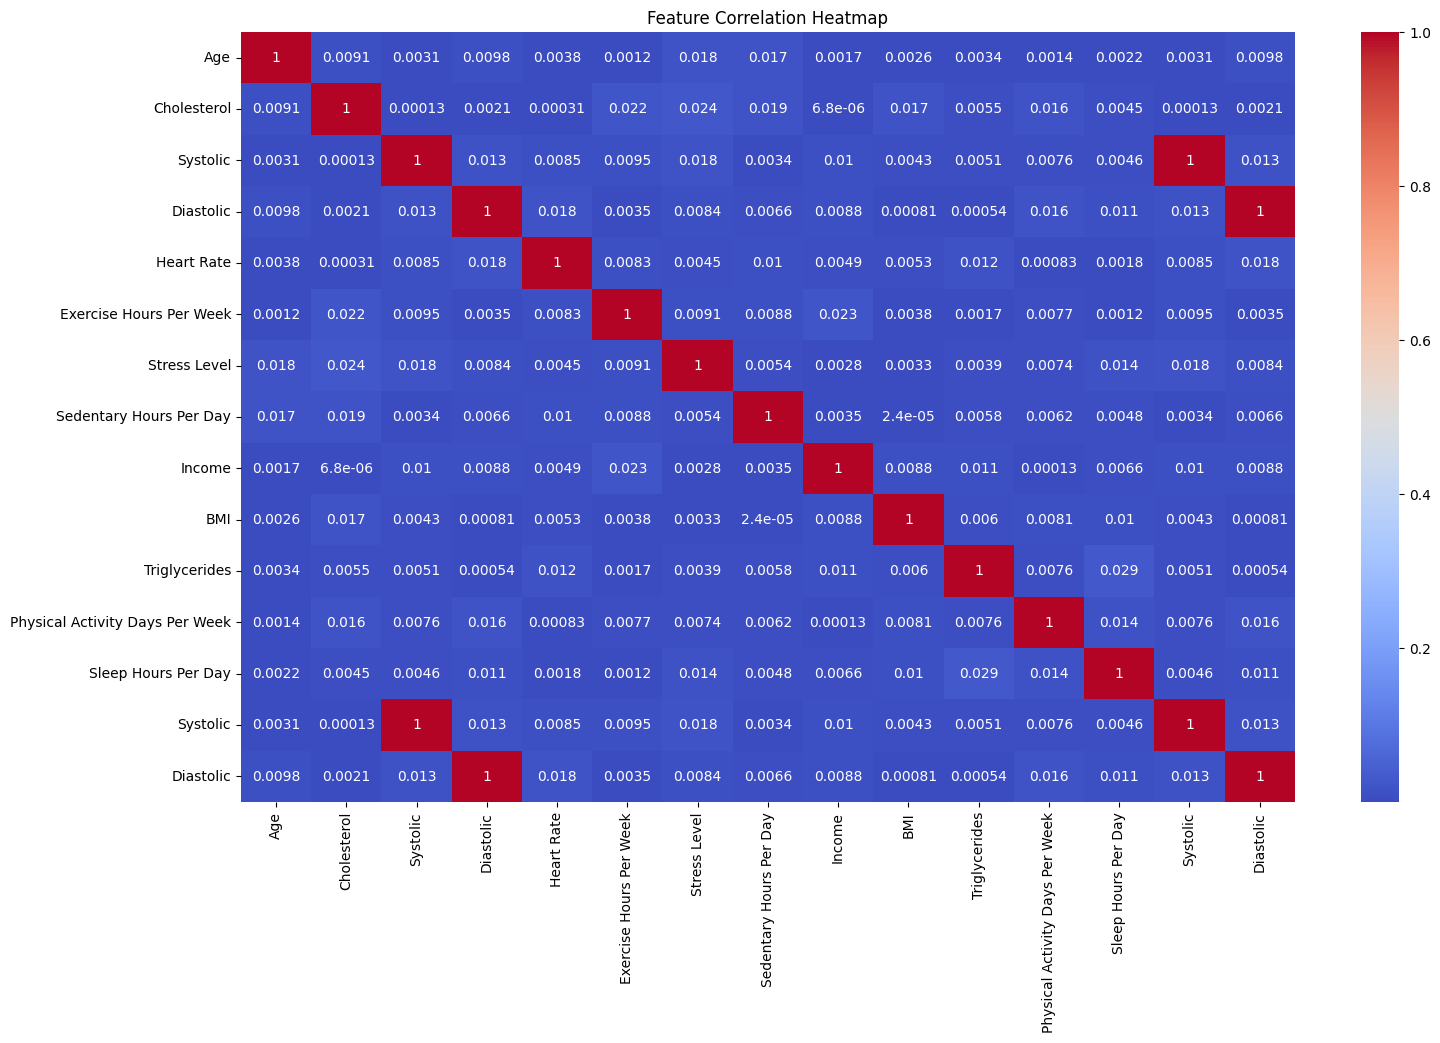

In [62]:
corr_matrix = df.corr(numeric_only=True).abs()

plt.figure(figsize=(17, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Feature Correlation Heatmap')
plt.show()

upper_triangle = corr_matrix.mask(np.tril(np.ones(corr_matrix.shape)).astype(bool))
high_correlation_features = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.85)]
# df.drop(columns=high_correlation_features, inplace=True)

Seeing that there is some difference in the number of individuals having heart attack against those who do not, we will check for class imbalances in any other feature as well. As we have divided our dataset into two main streams - clinical and demographic factors - we will view the details accordingly:

<h3>i. Clinical factors</h3>

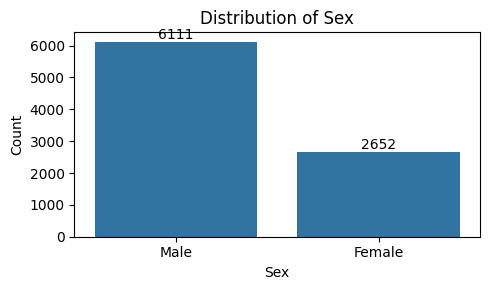

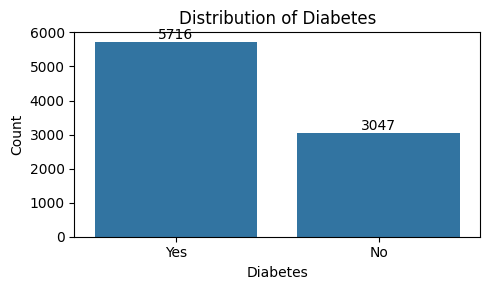

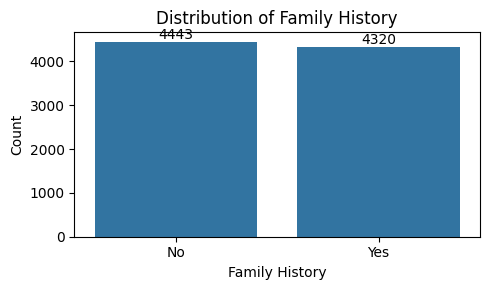

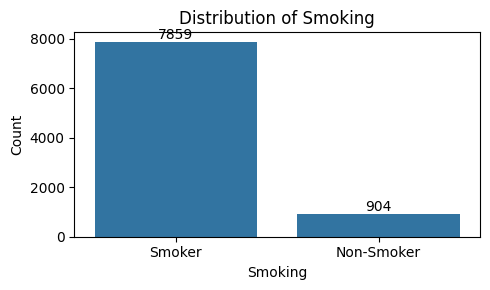

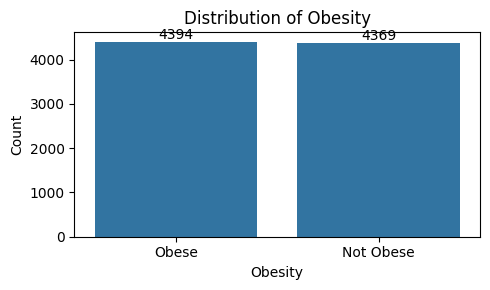

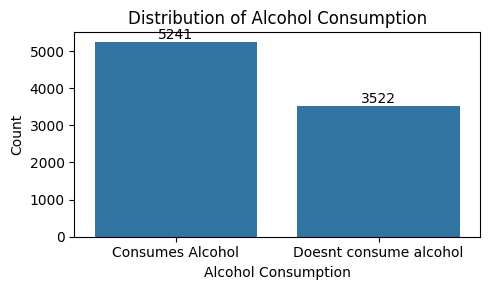

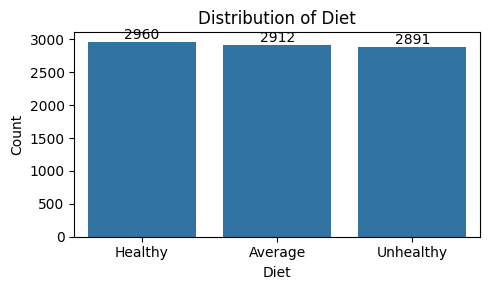

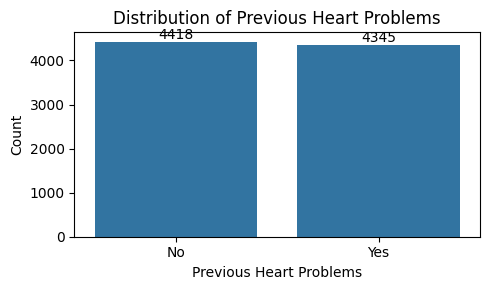

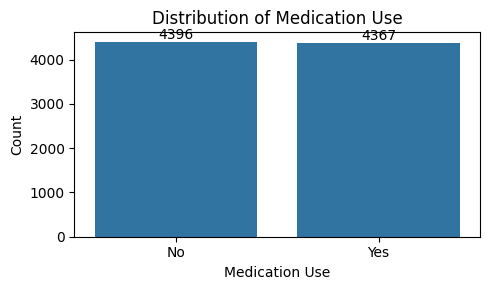

In [63]:
# categorical_cols = ['Sex', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 
#                     'Alcohol Consumption', 'Diet', 'Previous Heart Problems', 
#                     'Medication Use', 'Continent', 'Hemisphere']

# Make different graphs for triglycerides, cholesterol levels, and age
clinical_factors = ['Sex', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 
                    'Alcohol Consumption', 'Diet', 'Previous Heart Problems', 'Medication Use']

for col in clinical_factors:
    plt.figure(figsize=(5, 3))
    ax = sns.countplot(x=df[col], order=df[col].value_counts().index)

    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=0)

    # Add counts on top of bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 1, int(height), ha="center", va="bottom")

    plt.tight_layout()
    plt.show()

<h3>ii. Demographic factors</h3>

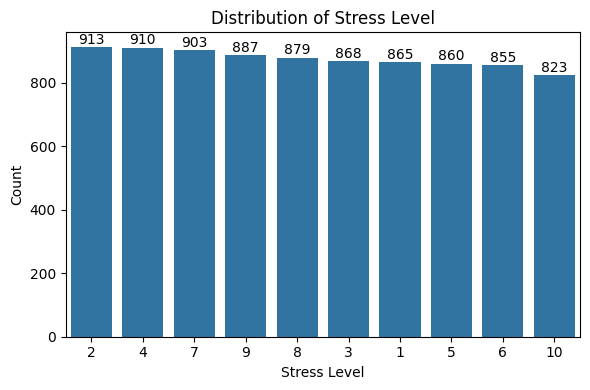

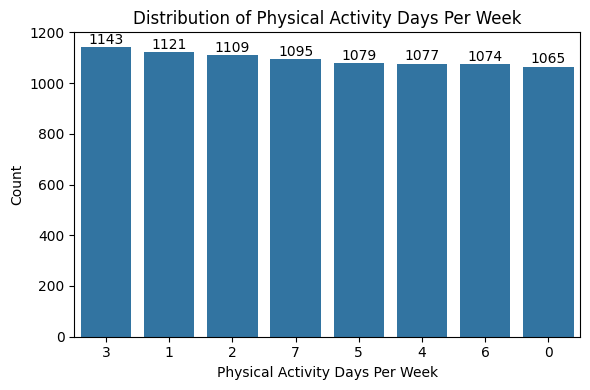

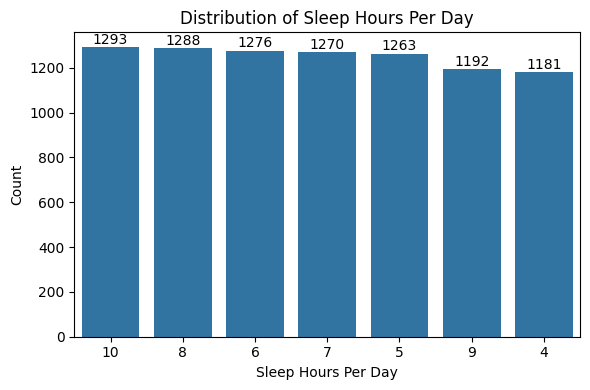

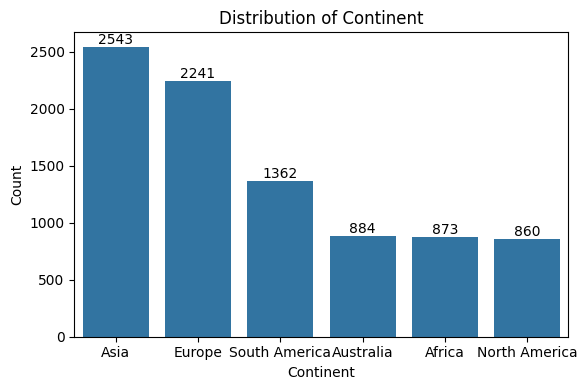

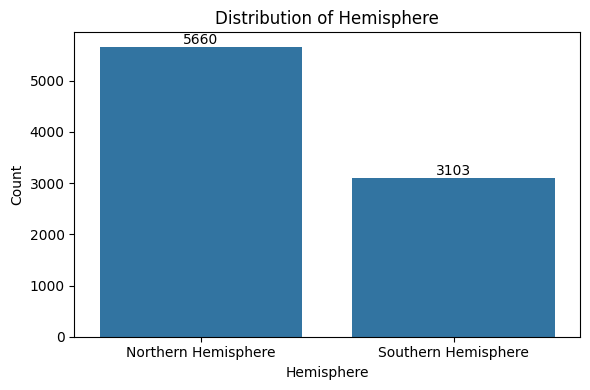

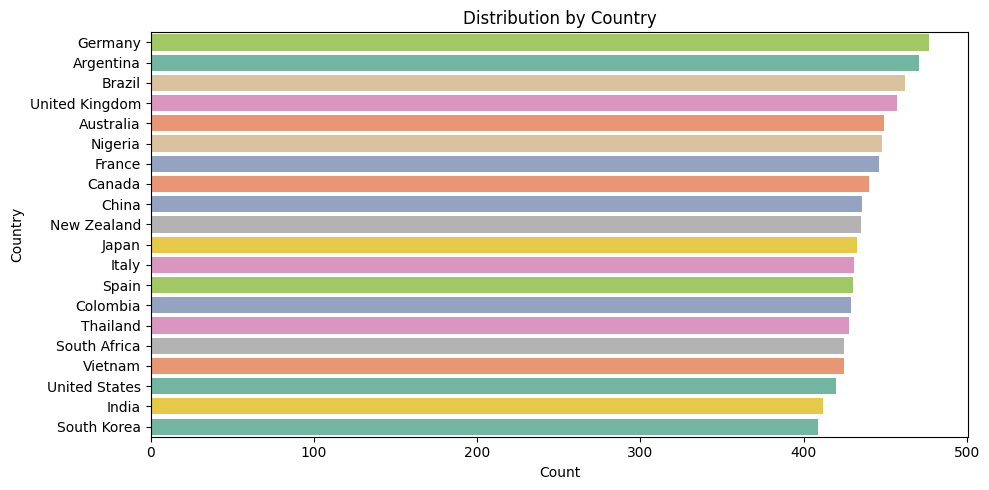

In [64]:
demographic_factors = ['Stress Level', 'Physical Activity Days Per Week',
                       'Sleep Hours Per Day', 'Continent', 'Hemisphere']

for col in demographic_factors:
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(x=df[col], order=df[col].value_counts().index, legend=False)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=0)

    # Add counts on top of bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 1, int(height), ha="center", va="bottom")

    plt.tight_layout()
    plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(y=df['Country'], order=df['Country'].value_counts().index, palette='Set2',hue=df['Country'],)
plt.title('Distribution by Country')
plt.xlabel('Count')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

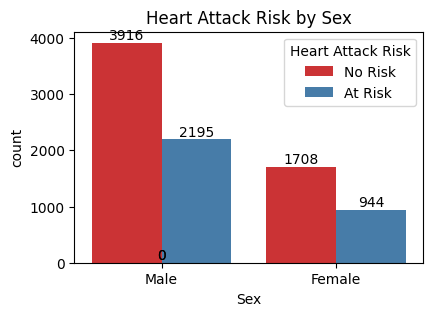

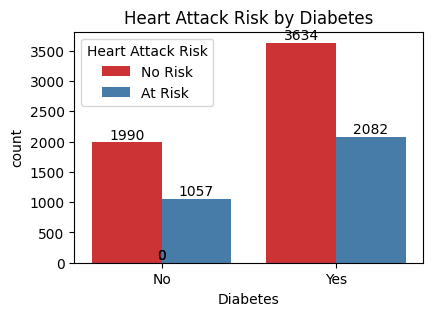

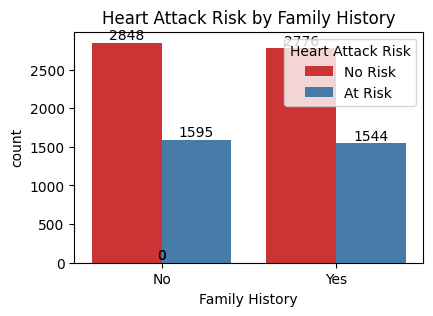

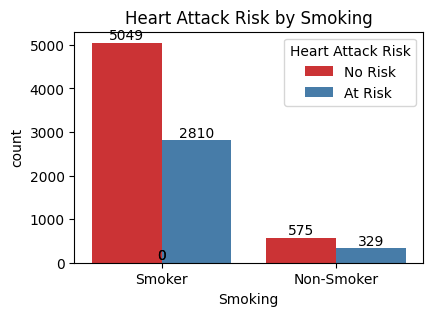

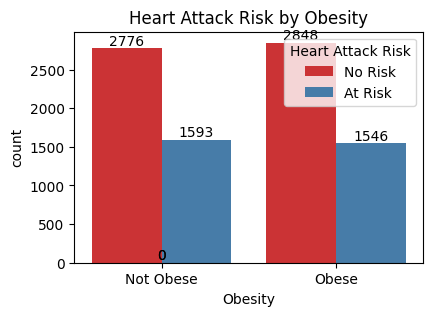

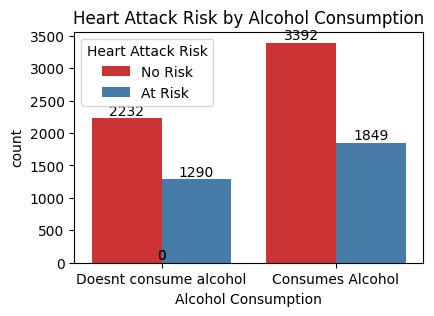

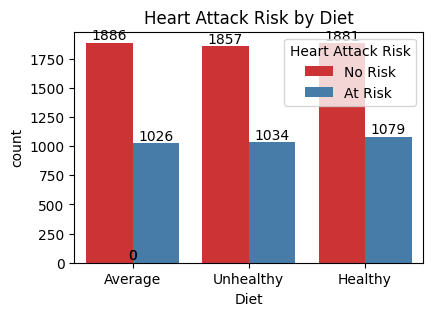

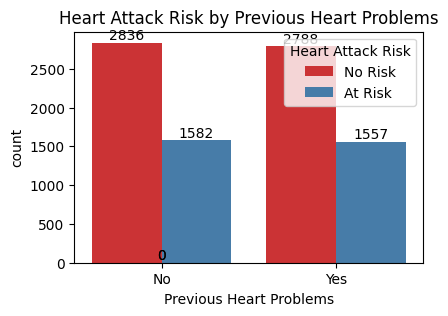

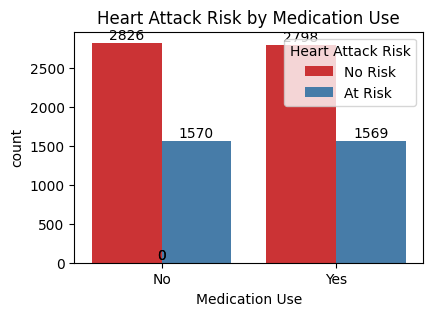

In [65]:
for col in clinical_factors:
    plt.figure(figsize=(4.5, 3))
    ax = sns.countplot(x=df[col], hue=df['Heart Attack Risk'], palette='Set1')
    plt.title(f'Heart Attack Risk by {col}')
    plt.xticks(rotation=0)
    plt.legend(title='Heart Attack Risk')

    # Add counts on top of bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 1, int(height), ha="center", va="bottom")

    plt.show()

In [66]:
df.columns

Index(['Age', 'Sex', 'Cholesterol', 'Systolic', 'Diastolic', 'Heart Rate',
       'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk', 'Systolic',
       'Diastolic'],
      dtype='object')

In [67]:
df['Heart Attack Risk'] = df['Heart Attack Risk'].replace({'At Risk': 1, 'No Risk': 0})
# df = df.drop(columns=['Continent', 'Hemisphere'])

df['Country'] = df.groupby('Country')['Heart Attack Risk'].transform('mean')        # Assigns mean of country per country

categorical_cols = ['Sex', 'Diabetes', 'Family History', 'Smoking', 'Obesity','Alcohol Consumption', 'Diet', 'Previous Heart Problems', 'Medication Use']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
X = df.drop(columns=['Heart Attack Risk'])
y = df['Heart Attack Risk'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


C:\Users\Codew\AppData\Local\Temp\ipykernel_12228\1468243367.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Heart Attack Risk'] = df['Heart Attack Risk'].replace({'At Risk': 1, 'No Risk': 0})


ValueError: could not convert string to float: 'South America'

In [ ]:
# Logistic Regression 
class LogisticRegressionClass:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros((n, 1))
        self.bias = 0
        for _ in range(self.epochs):
            z = np.dot(X, self.weights) + self.bias
            a = self.sigmoid(z)
            dz = a - y
            dw = np.dot(X.T, dz) / m
            db = np.sum(dz) / m
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.weights) + self.bias)

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)

    def score(self, X, y):
        return np.mean(self.predict(X) == y)

In [ ]:
#neural network
class MyNN:
    def __init__(self, input_size, hidden_size=16, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, 1) * 0.01
        self.b2 = np.zeros((1, 1))

    def relu(self, Z):
        return np.maximum(0, Z)

    def relu_derivative(self, Z):
        return (Z > 0).astype(float)

    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))

    def fit(self, X, y):
        m = X.shape[0]
        for _ in range(self.epochs):
            Z1 = np.dot(X, self.W1) + self.b1
            A1 = self.relu(Z1)
            Z2 = np.dot(A1, self.W2) + self.b2
            A2 = self.sigmoid(Z2)
            dZ2 = A2 - y
            dW2 = np.dot(A1.T, dZ2) / m
            db2 = np.sum(dZ2) / m
            dA1 = np.dot(dZ2, self.W2.T)
            dZ1 = dA1 * self.relu_derivative(Z1)
            dW1 = np.dot(X.T, dZ1) / m
            db1 = np.sum(dZ1, axis=0, keepdims=True) / m
            self.W1 -= self.learning_rate * dW1
            self.b1 -= self.learning_rate * db1
            self.W2 -= self.learning_rate * dW2
            self.b2 -= self.learning_rate * db2

    def predict_proba(self, X):
        Z1 = np.dot(X, self.W1) + self.b1
        A1 = self.relu(Z1)
        Z2 = np.dot(A1, self.W2) + self.b2
        return self.sigmoid(Z2)

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)

    def score(self, X, y):
        return np.mean(self.predict(X) == y)

<h2>SMOTE usage</h2>

Here, we are using SMOTE to cater to class imbalances:

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split your dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# training and eval
logreg = LogisticRegressionClass()
logreg.fit(np.array(X_train_resampled, dtype=float), np.array(y_train_resampled, dtype=float))
print("Logistic Regression Accuracy:", logreg.score(X_test, y_test))

nn = MyNN(input_size=X_train.shape[1])
nn.fit(X_train_resampled.to_numpy(), y_train_resampled.to_numpy())
print("Neural Network Accuracy:", nn.score(X_test, y_test))

ValueError: non-broadcastable output operand with shape (26,1) doesn't match the broadcast shape (26,8436)

<h2>Sklearn Model Evaluation</h2>

The below cell shows the:
- Confusion matrix
- Precision
- Recall
- F1 Score

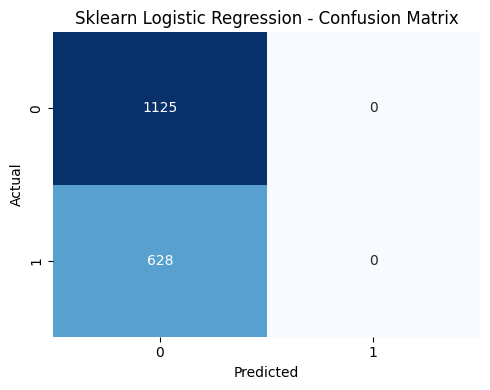

Sklearn Logistic Regression - Evaluation Metrics
Precision: 0.0
Recall: 0.0
F1 Score: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78      1125
           1       0.00      0.00      0.00       628

    accuracy                           0.64      1753
   macro avg       0.32      0.50      0.39      1753
weighted avg       0.41      0.64      0.50      1753



c:\Users\Codew\anaconda3.12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Codew\anaconda3.12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Codew\anaconda3.12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Codew\anaconda3.12\Lib\site-pa

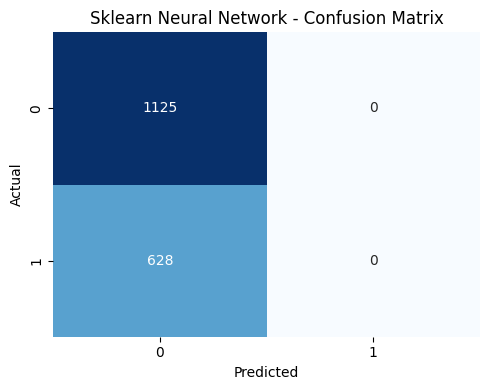

Sklearn Neural Network - Evaluation Metrics
Precision: 0.0
Recall: 0.0
F1 Score: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78      1125
           1       0.00      0.00      0.00       628

    accuracy                           0.64      1753
   macro avg       0.32      0.50      0.39      1753
weighted avg       0.41      0.64      0.50      1753



c:\Users\Codew\anaconda3.12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Codew\anaconda3.12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Codew\anaconda3.12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Codew\anaconda3.12\Lib\site-pa

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(y_test, y_pred, model_name):
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot Heatmap
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

    # Print classification report
    print(f"{model_name} - Evaluation Metrics")
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))


# Evaluate Sklearn Logistic Regression
evaluate_model(y_test, logreg.predict(X_test), "Sklearn Logistic Regression")

# Evaluate Sklearn Neural Network
evaluate_model(y_test, nn.predict(X_test), "Sklearn Neural Network")


<h2>Scikit-learn Model Evaluation</h2>

Below are the accuracies and evaluation given by the sklearn library's machine learning models.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Logistic Regression using sklearn
sk_logreg = LogisticRegression(max_iter=1000)  # increase max_iter if needed
sk_logreg.fit(X_train, y_train)
y_pred_logreg = sk_logreg.predict(X_test)
print("Sklearn Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))

# Neural Network using sklearn's MLPClassifier
sk_nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
sk_nn.fit(X_train, y_train)
y_pred_nn = sk_nn.predict(X_test)
print("Sklearn Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))


Sklearn Logistic Regression Accuracy:

c:\Users\Codew\anaconda3.12\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 0.6417569880205363


c:\Users\Codew\anaconda3.12\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Sklearn Neural Network Accuracy: 0.5350827153451226
